# Homework 9
## Adam Sanchez 
### MATH 4650

______________________________________________________________________________________________________________________

### 1)

$\begin{eqnarray*}
y'' + 5y' +6y = \cos{t} \text{; } y(0) = 1 \text{; } y'(0) = 0\\
\text{Let } y_h \text{ be the solution to } y'' + 5y' +6y = 0\\
\text{ansatz } y_h = e^{rt} \text{ where r: }\\
r^2 + 5r + 6 = 0\\
(r+2)(r+3) = 0 \\
r = -2 \text{; } r = -3 \\
y_h = C_1e^{-2t}+C_2e^{-3t}\\
\text{Let } y_p \text{ be the particular solution to the ODE: }\\
\text{ansatz } y_p = B_0\sin{t}+A_0\cos{t}\\
\implies y_p' = B_0\cos{t} -A_0\sin{t}\\
\implies y_p'' = -B_0\sin{t}-A_0\cos{t}\\
\text{Substituting these into the ODE: }\\
-B_0\sin{t}-A_0\cos{t} + 5B_0\cos{t} -5A_0\sin{t} + 6B_0\sin{t}+6A_0\cos{t} = \cos{t}\\
\left(-A_0 + 5B_0+6A_0 \right)\cos{t} + \left(-B_0-5A_0+6B_0\right) \sin{t} = \cos{t} + 0 \sin{t}\\
\implies -A_0 + 5B_0+6A_0 = 1 \text{; } -B_0-5A_0+6B_0 = 0\\
\implies A_0 = \frac{1}{10} \text{; } B_0 = \frac{1}{10}\\
\text{Thus } y_p = \frac{1}{10}\sin{t} + \frac{1}{10}\cos{t}\\
\text{So the general solution is: }\\
y(t) = C_1e^{-2t}+C_2e^{-3t} + \frac{1}{10}\sin{t} + \frac{1}{10}\cos{t}\\
\text{Now implementing our initial conditions: }\\
y'(t) = -2C_1e^{-2t}-3C_2e^{-3t} + \frac{1}{10}\cos{t} - \frac{1}{10}\sin{t}\\
y(0) = C_1e^{-2*0}+C_2e^{-3*0} + \frac{1}{10}\sin{0} + \frac{1}{10}\cos{0} = 1\\
 \implies  C_1 +C_2 +\frac{1}{10} = 1 \textbf{ (1) }\\
y'(0) = -2C_1e^{-2*0}-3C_2e^{-3*0} + \frac{1}{10}\cos{0} - \frac{1}{10}\sin{0} = 0\\
\implies 2C_1 + 3C_2 = \frac{1}{10}\textbf{ (2) }\\
\text{From } \textbf{(1)} \text{ and } \textbf{(2)} \text{ we can conclude: }\\
C_1 = \frac{13}{5} \text{; } C_2 -\frac{17}{10}\\
\text{Therefore our solution is: }\\ 
y(t) = \frac{13}{5}e^{-2t}-\frac{17}{10}e^{-3t}+\frac{1}{10}\sin{t}+\frac{1}{10}\cos{t}
\end{eqnarray*}$

______________________________________________________________________________________________________________________

### 2)

In [72]:
import numpy as np
import pandas as pd
from numpy import sin, cos, exp
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.interpolate # use for scipy.interpolate.CubicHermiteSpline
from scipy.integrate import solve_ivp
mpl.rcParams["figure.figsize"] = [8,6] # or 7, 4 or 10,8
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["lines.markersize"] = 4
mpl.rcParams.update({'font.size': 20})
mpl.rcParams['mathtext.fontset'] = 'cm'

###### a)

$\begin{eqnarray*}
y'' + 5y' +6y = \cos{t}\\
y'' = \cos{t} - 5y' - 6y\\
\text{Let } y_1 = y \text {; } y_2 = y'\\
\text{So our system is: }\\
y_1' = y_2 = u'\\
y_2' = y''  = -6y_1-5y_2+cos(t) = -6u-5v+\cos{t}=v'
\end{eqnarray*}$

###### b)

In [107]:
def RKMethod(tspan, h, ic): 
    n = round((tspan[1]-tspan[0])/h)
    t_step = np.linspace(tspan[0],tspan[1],n+1)
    h = t_step[1] - t_step[0]
    u = np.zeros(len(t_step))
    v = np.zeros(len(t_step))
    f = lambda t,u,v: [v,cos(t)-5*v-6*u]
    u[0] = ic[0]
    v[0] = ic[1] 
    for i in range(0, len(t_step)-1):
        t_i = t_step[i]
        
        k1 = h*pd.Series(f(t_i,u[i],v[i]))
        k2 = h*pd.Series(f(t_i+(h/3), u[i]+k1[0]/3, v[i]-k1[1]/3))
        k3 = h*pd.Series(f(t_i+2*(h/3), u[i]-k1[0]/3+k2[0], v[i]-k1[1]/3+k2[1]))
        k4 = h*pd.Series(f(t_i+h,u[i]+k1[0]-k2[0]+k3[0], v[i]+k1[1]-k2[1]+k3[1]))
        
        u[i+1] = u[i]+(1/8)*k1[0]+(3/8)*k2[0]+(3/8)*k3[0]+(1/8)*k4[0]
        v[i+1] = v[i]+(1/8)*k1[1]+(3/8)*k2[1]+(3/8)*k3[1]+(1/8)*k4[1]
    return t_step, u
        
    

In [109]:
t_span = [0,20]
i_c = [1,0]
y_true = lambda t: (13/5)*np.exp(-2*t)-(17/10)*np.exp(-3*t)+(1/10)*sin(t)+(1/10)*cos(t) 

tHist, WHist = RKMethod(t_span, 0.1, i_c)
y = y_true(tHist)

Text(0.5,1,'ODE Approximation')

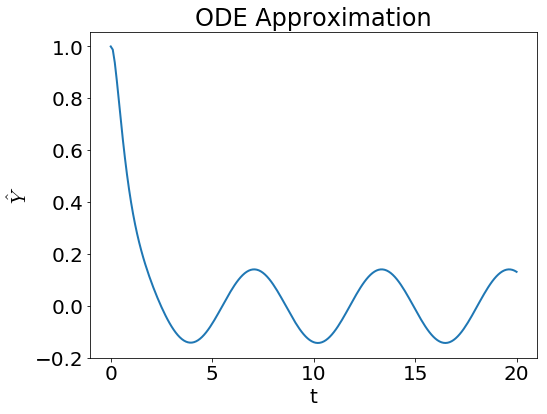

In [112]:
plt.plot(tHist,WHist)
plt.xlabel("t"); plt.ylabel("$\hat{Y}$")
plt.title("ODE Approximation")

###### c)

From the graph below it looks like we are somewhere in between $O(h^2)$ and $O(h^4)$ but much closer to $O(h^2)$. I think this makes sense because I believe that a 4th step RK Method is $O(h^3)$ so I believe we are doing pretty well!

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


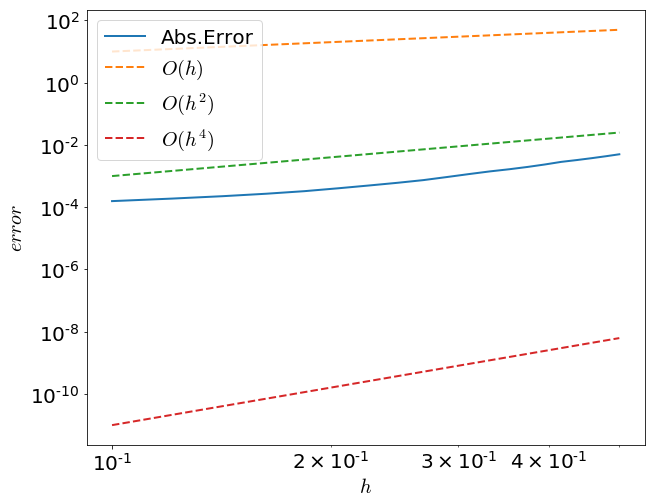

In [104]:
hList = np.linspace(0.1,.5,20)
t_span = [0,20]
i_c = [1,0]
err = []

for i in hList: 
    tHist, wHist = RKMethod(t_span, i, i_c)
    a = wHist[-1]
    err.append(abs(y_true(20)-a))
    #err.append(a)

plt.figure(figsize=(10,8)) 
plt.loglog(hList, err,label = 'Abs. Error')
plt.loglog(hList,hList/(10**(-2)),'--',label = '$O(h)$')
plt.loglog(hList,(hList**2)/10,'--',label = '$O(h^2)$')
plt.loglog(hList,(hList**4)/(10**7),'--',label = '$O(h^4)$')
plt.xlabel("$h$"); plt.ylabel("$error$");
plt.legend(['Abs.Error','$O(h)$','$O(h^2)$','$O(h^4)$'])

###### b)

See code above